In [16]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor


## cross entropy function will apply the sofmax function internally


In [17]:
device='mps' if torch.backends.mps.is_available() else 'cpu'

In [18]:
train_data=datasets.FashionMNIST(root='data1',train=True,
                                 download=True,
                                 transform=ToTensor(),
                                 target_transform=None)
test_data=datasets.FashionMNIST(root='data1',train=False,
                               download=True,
                               transform=ToTensor(),
                               target_transform=None)

                               

In [19]:
train_data.targets
print(train_data.data.shape)
from torch.utils.data import Dataset

torch.Size([60000, 28, 28])


In [20]:
class FashionDataset(Dataset):
    def __init__(self,x,y):
        x=x.float()
        x=x.view(-1,28*28)
        self.x,self.y=x,y

    def __getitem__(self,ix):
        x,y=self.x[ix],self.y[ix]
        return x.to(device),y.to(device)

    def __len__(self):
        return len(self.x)

* the above code do the following:
* convert he image to the flatten 28*28 numeric values
* Number of datapoints __len__
* __getitem__ will give the for what should be returned

In [21]:
images=train_data.data
targets=train_data.targets
from torch.utils.data import DataLoader
def get_data():
    train=FashionDataset(images,targets)
    trn_dl=DataLoader(dataset=train,batch_size=16,shuffle=True)
    return trn_dl

In [22]:
def get_model():
    model=nn.Sequential(
                nn.Linear(in_features=28*28,out_features=1000),
                nn.ReLU(),
                nn.Linear(in_features=1000,out_features=10)
    ).to(device)
    loss_fn=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(params=model.parameters(),lr=1e-2)
    return model,loss_fn,optimizer

## In this model we do not use the softmax for the crossEntropyLoss because it was included in the loss function inself

In [23]:
def train_batch(x,y,model,opt,loss_fn):
    model.train()
    y_logit=model(x)
    loss=loss_fn(y_logit,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.item()

In [24]:
@torch.no_grad()

def accuracy(x,y,model):
    model.eval()

    pred=model(x)
    max_values,argmaxes=pred.max(-1)
    is_correct=(argmaxes==y)
    return is_correct.cpu().numpy().tolist()

## now lots train the data

In [25]:
trn_dl=get_data()


In [26]:
model,loss_fn,optimizer=get_model()

In [27]:
losses,accuracies=[],[]

In [28]:
from tqdm.auto import tqdm


In [29]:
for epoch in tqdm(range(5)):
        epochloss=0
        for ix,(x,y) in enumerate(trn_dl):
            
            batchloss=train_batch(x,y,model,optimizer,loss_fn)
            epochloss+=batchloss
            if(ix%10000==0):
                print(batchloss)

        losses.append(epochloss)

  0%|          | 0/5 [00:00<?, ?it/s]

50.69759750366211
2.2946078777313232
2.3242292404174805
2.3029584884643555
2.3020801544189453


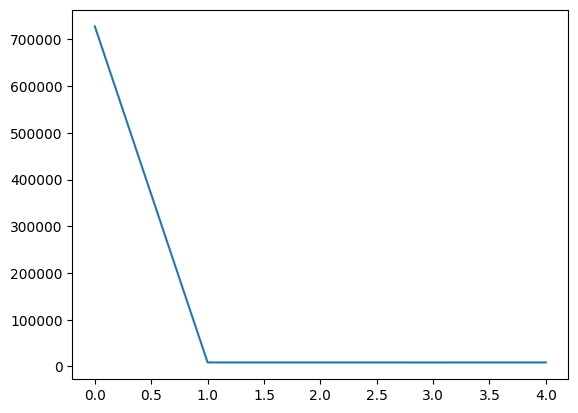

In [30]:
import matplotlib.pyplot as plt
plt.plot(losses)

* we can also use the adams for the optimizer
* others like AdamW,Adagrad,Adadata,LBFGS,RMSprop etc..
* we have to choose the learning rate very carefully
* we need high lr initially and low lr subsequently